In [1]:
from map_generator import MapGenerator
import matplotlib.pyplot as plt
from Planners.abc.abc_problem import ABCProblem
from Planners.pso.pso_problem import PSOProblem
from Planners.gwo.gwo_problem import GWOProblem
from Planners.helper import linear_interpolation, cost_func
import numpy as np
from IPython.display import display, clear_output
import os

In [2]:
map_gen = MapGenerator('map_params/custom_map_3_params.yaml')

(500, 500)


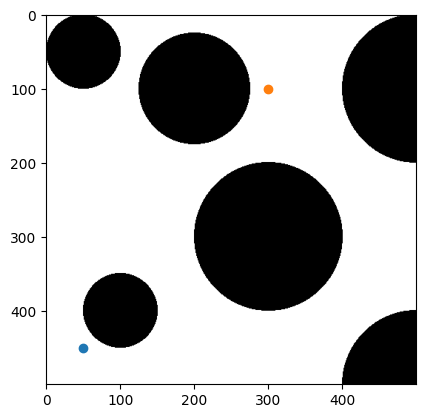

In [3]:
curr_map = map_gen.map.get_map()
start = np.array([50, 450]).astype(np.int32)
end = np.array([300, 100]).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
plt.scatter([start[0]], [start[1]])
plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [4]:
def cost_function(particles):
    global curr_map, start, end
    points = particles.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    cost = cost_func(path, curr_map, 3, 1)
    return cost

In [13]:
sols = list()
def test(x, y):
    print('Completed iteration', x+1)
    sols.append(y)

optimizer = {
    'PSO Optimizer': PSOProblem,
    'GWO Optimizer': GWOProblem,
    'ABC Optimizer': ABCProblem
}

curr_opt = 'PSO Optimizer'

opt = optimizer[curr_opt](
    iteration_number=20,
    bees=10,
    high_step_prob=0.3,
    particles=20,
    wolves=20,
    function=cost_function,
    points=3,
    iteration_callback=test,
    c_1=1.5,
    c_2=1.5,
    weight=0.5
)

In [14]:
best_sol = opt.solve()

Completed iteration 1
Completed iteration 2
Completed iteration 3
Completed iteration 4
Completed iteration 5
Completed iteration 6
Completed iteration 7
Completed iteration 8
Completed iteration 9
Completed iteration 10
Completed iteration 11
Completed iteration 12
Completed iteration 13
Completed iteration 14
Completed iteration 15
Completed iteration 16
Completed iteration 17
Completed iteration 18
Completed iteration 19
Completed iteration 20


In [15]:
# Generate figures
figures = list()
itr = 1
for sol in sols:
    points = sol.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    fig = plt.figure()
    plt.title('%s: Iteration %d' % (curr_opt, itr))
    plt.imshow(curr_map, cmap='gray')
    plt.scatter([start[0]], [start[1]])
    plt.scatter([end[0]], [end[1]])
    plt.plot(path[:, 0], path[:, 1])
    figures.append(fig)
    plt.close()
    print('Generated for Iteration %d' % itr)
    itr += 1

Generated for Iteration 1
Generated for Iteration 2
Generated for Iteration 3
Generated for Iteration 4
Generated for Iteration 5
Generated for Iteration 6
Generated for Iteration 7
Generated for Iteration 8
Generated for Iteration 9
Generated for Iteration 10
Generated for Iteration 11
Generated for Iteration 12
Generated for Iteration 13
Generated for Iteration 14
Generated for Iteration 15
Generated for Iteration 16
Generated for Iteration 17
Generated for Iteration 18
Generated for Iteration 19
Generated for Iteration 20


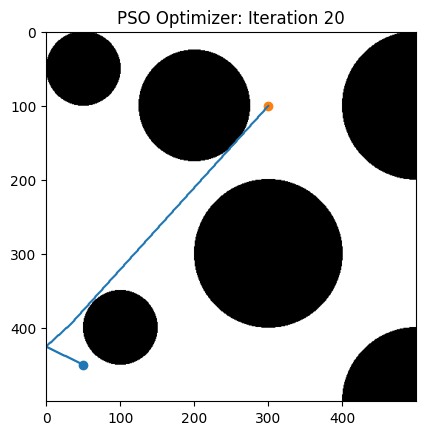

In [16]:
# Display figure
for fig in figures:
    display(fig)
    #clear_output(wait = True)
    plt.pause(0.1)
    clear_output(wait = True)

In [11]:
a = """
save_dir = os.path.join('results', curr_opt+' itrs')
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
itr = 1
for fig in figures:
    file_addr = os.path.join(save_dir, 'iteration_%d.png' % itr)
    fig.savefig(file_addr)
    print('saved:', file_addr)
    itr += 1
"""